# Import Required Packages

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import datetime

# Bold Print Function

In [8]:
def print_bold(string):
    """
    Function to print strings in bold text.
    """
    print("\033[1m" + string + "\033[0m")

# Load Original CSV file - covid19-cdc-20204844.csv

In [9]:
df = pd.read_csv('data/covid19-cdc-20204844.csv')

# 1. Data Quality Report (40)

### Check how many rows the CSV has

In [10]:
num_rows = df.shape[0]
features = df.shape[1]
print(f"The dataset has {num_rows} rows with {features} features.")

The dataset has 10000 rows with 12 features.


### Print the first 5 and last 5 rows  

In [11]:
print("The first 5 Rows are:")
df.head(5)

The first 5 Rows are:


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/18,2021/01/16,2020/03/19,2020/03/18,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Yes
1,2020/12/04,NaN,NaN,NaN,Laboratory-confirmed case,Female,10 - 19 Years,"Multiple/Other, Non-Hispanic",No,Missing,No,Missing
2,2021/01/12,NaN,NaN,NaN,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Unknown,Missing,No,Missing
3,2020/11/04,2020/11/15,NaN,2020/11/04,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",No,Unknown,No,No
4,2020/04/10,2021/01/20,2020/04/12,2020/04/10,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,No,Missing,No,Missing


In [12]:
print("The last 5 Rows are:")
df.tail(5)

The last 5 Rows are:


,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020/12/14,2020/12/14,NaN,2020/12/14,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,No,Missing,No,Missing
9996,2020/08/18,2020/08/23,2020/08/19,2020/08/18,Laboratory-confirmed case,Male,50 - 59 Years,"White, Non-Hispanic",Missing,Missing,No,No
9997,2020/04/15,2020/06/10,NaN,2020/04/15,Laboratory-confirmed case,Male,50 - 59 Years,Hispanic/Latino,No,Unknown,No,Yes
9998,2020/12/17,NaN,NaN,NaN,Laboratory-confirmed case,Male,40 - 49 Years,"White, Non-Hispanic",No,Missing,No,Missing
9999,2020/06/29,2020/06/29,NaN,NaN,Laboratory-confirmed case,Female,30 - 39 Years,"White, Non-Hispanic",No,Missing,No,Missing


### Convert the features to their appropriate data types (continuous / categorical)  

In [13]:
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

> All the columns appear as objects, need to take a closer look at each feature. Column names are satisfactory as they are and do not need any cleaning.

In [14]:
# Descriptive Statistics
df.describe().T

,count,unique,top,freq
cdc_case_earliest_dt,10000,323,2021/01/04,119
cdc_report_dt,7730,327,2020/06/10,139
pos_spec_dt,2792,314,2021/01/05,36
onset_dt,5084,324,2020/12/03,48
current_status,10000,2,Laboratory-confirmed case,9310
sex,10000,4,Female,5160
age_group,10000,10,20 - 29 Years,1911
race_ethnicity_combined,10000,9,Unknown,3942
hosp_yn,10000,4,No,5294
icu_yn,10000,4,Missing,7622


In [15]:
# Taking a look at age_group
df['age_group'].unique()

array(['20 - 29 Years', '10 - 19 Years', '0 - 9 Years', '50 - 59 Years',
       '30 - 39 Years', '60 - 69 Years', '40 - 49 Years', '70 - 79 Years',
       '80+ Years', 'Missing'], dtype=object)

> *cdc_case_earliest_dt*, *cdc_report_dt*, *pos_spec_dt*, and *onset_dt* are all **dates**, I will treat these as continuous and change them to the '*datetime64*' datatype.
<br><br>
I will treat the rest of the features as categorical as they are not numerical features.

In [16]:
# Select columns containing categorical data
categorical_columns = df[['current_status','sex','age_group','race_ethnicity_combined','hosp_yn','icu_yn','death_yn','medcond_yn']].columns

# Change the column type to category
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [17]:
# Select columns containing continuous data (the dates)
continuous_columns = df[['cdc_case_earliest_dt','cdc_report_dt','pos_spec_dt','onset_dt']].columns

# 
for column in continuous_columns:
    df[column] = df[column].astype('datetime64')

In [18]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

### Drop duplicate rows and columns (if any)

##### Checking for duplicate rows

In [19]:
# Find number of duplicate rows
num_duplicate_rows = df.duplicated().sum()
print(f"There are {num_duplicate_rows} duplicated rows in this dataset (excluding the first row).")
num_duplicate_rows_inclusive = df[df.duplicated(keep=False)].shape[0]
print(f"There are {num_duplicate_rows_inclusive} duplicated rows in this dataset (including row that is duplicated).")

There are 431 duplicated rows in this dataset (excluding the first row).
There are 777 duplicated rows in this dataset (including row that is duplicated).


##### Checking for duplicate columns

In [20]:
# Find number of duplicate columns
df_transposed = df.T
num_duplicate_cols = df_transposed.duplicated().sum()
print(f"There are {num_duplicate_cols} duplicated columns in this dataset (excluding the first column).")
num_duplicate_cols_inclusive = df_transposed[df_transposed.duplicated(keep=False)].shape[0]
print(f"There are {num_duplicate_cols_inclusive} duplicated columns in this dataset (including column that is duplicated).")

There are 0 duplicated columns in this dataset (excluding the first column).
There are 0 duplicated columns in this dataset (including column that is duplicated).


> There are duplicate rows in this dataset.  
However, there is no primary key in the dataset to determine whether the same individual has been entered twice.
<br><br>
> There are no duplicate columns in this dataset.

In [21]:
# Show all the duplicated rows sorting by *cdc_case_earliest_dt* to compare
df_duplicates = df[df.duplicated(keep=False)].sort_values('cdc_case_earliest_dt')
df_duplicates

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
7713,2020-03-26,2021-01-16,2020-03-26,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Missing,Missing,No,Missing
2285,2020-03-26,2021-01-16,2020-03-26,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Missing,Missing,No,Missing
8960,2020-05-04,2021-01-21,2020-05-04,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
2500,2020-05-04,2021-01-21,2020-05-04,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
4759,2020-05-12,2021-01-22,2020-05-12,NaT,Probable Case,Female,40 - 49 Years,Unknown,Missing,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2021-01-15,NaT,NaT,NaT,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,Missing,Missing,No,Missing
3367,2021-01-16,NaT,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Unknown,Missing,No,Missing
2991,2021-01-16,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing
7829,2021-01-16,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing


> Interesting that from above all duplicates appear to have the value 'No' for *death_yn* and that the main features have unknown/missing values

In [22]:
# Check the value breakdown for 'death_yn' in the duplicate rows
df_duplicates['death_yn'].value_counts()

No     777
Yes      0
Name: death_yn, dtype: int64

> All of the duplicate rows have 'No' as the value for *death_yn*. As this is my target variable I am adverse to removing these rows so as not to skew any analysis.

In [23]:
print_bold("Value count for 'sex' in duplicate rows:")
print(df_duplicates['sex'].value_counts())

print_bold("\nValue count for 'age_group' in duplicate rows:")
print(df_duplicates['age_group'].value_counts())

print_bold("\nValue count for 'race_ethnicity_combined' in duplicate rows:")
print(df_duplicates['race_ethnicity_combined'].value_counts())

print_bold("\nValue count for 'hosp_yn' in duplicate rows:")
print(df_duplicates['hosp_yn'].value_counts())

print_bold("\nValue count for 'icu_yn' in duplicate rows:")
print(df_duplicates['icu_yn'].value_counts())

print_bold("\nValue count for 'medcond_yn' in duplicate rows:")
print(df_duplicates['medcond_yn'].value_counts())

Value count for 'sex' in duplicate rows:
Female     406
Male       371
Missing      0
Unknown      0
Name: sex, dtype: int64

Value count for 'age_group' in duplicate rows:
20 - 29 Years    206
40 - 49 Years    176
30 - 39 Years    150
50 - 59 Years     87
10 - 19 Years     86
60 - 69 Years     47
0 - 9 Years       17
70 - 79 Years      6
80+ Years          2
Missing            0
Name: age_group, dtype: int64

Value count for 'race_ethnicity_combined' in duplicate rows:
Unknown                                                 683
White, Non-Hispanic                                      51
Multiple/Other, Non-Hispanic                             23
Hispanic/Latino                                          10
Asian, Non-Hispanic                                       6
Black, Non-Hispanic                                       4
American Indian/Alaska Native, Non-Hispanic               0
Missing                                                   0
Native Hawaiian/Other Pacific Islander, Non-H

> On further analysis it appears that in the duplicate rows many of the features have missing values. Only *sex*, *race_ethnicity_combined* and *age_group* have no missing values. However, a large proportion of the *race_ethnicity_combined* values are 'Unknown' and there appears to be an even divide in *sex* in the duplicates rows.
<br><br>
Due to the missing values for the features in the duplicate rows I have decided to drop the duplicate rows from this dataset.

In [24]:
# Drop duplicate rows
df = df.drop_duplicates(keep=False)

In [25]:
# Check that duplicates have been removed
num_duplicate_rows = df[df.duplicated()].shape[0]
print(f"Duplicate rows remaining: {num_duplicate_rows}")

Duplicate rows remaining: 0


### Drop constant columns

##### Check for Constant Columns

In [26]:
# Print Categorical Descriptive Statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,9223,2,Laboratory-confirmed case,8540
sex,9223,4,Female,4754
age_group,9223,10,20 - 29 Years,1705
race_ethnicity_combined,9223,9,"White, Non-Hispanic",3379
hosp_yn,9223,4,No,5166
icu_yn,9223,4,Missing,6872
death_yn,9223,2,No,8897
medcond_yn,9223,4,Missing,6694


> All categorical features have more than 1 unique value, therefore there are no constant columns that need to be dropped.

In [27]:
# Check that the continuous features have a standard deviation greater than zero
df[continuous_columns].std()

cdc_case_earliest_dt   86 days 07:59:23.388256672
cdc_report_dt          81 days 09:19:09.980629870
pos_spec_dt            91 days 03:39:47.475978219
onset_dt               85 days 15:22:23.339754007
dtype: timedelta64[ns]

> All continuous features have a non zero standard deviation and therefore there are no constant columns.

### Save update/cleaned data frame in new CSV file

In [28]:
df.to_csv('data/covid19-cdc-20204844_1-1_cleaned.csv')

## For clean CSV and dataframe

### Prepare table with descriptive stats for all **continuous** features

In [29]:
# Print table with descriptive statistics for all the categorical features
continuousFeatureDesc = df[continuous_columns].describe(datetime_is_numeric=True).T
continuousFeatureDesc.to_csv("data/continuousFeatureDescription.csv")
continuousFeatureDesc

,count,mean,min,25%,50%,75%,max
cdc_case_earliest_dt,9223,2020-09-30 07:06:14.325056768,2020-01-01,2020-07-22 00:00:00,2020-11-01,2020-12-11,2021-01-16
cdc_report_dt,7573,2020-10-15 19:32:27.603327744,2020-01-01,2020-08-14 00:00:00,2020-11-10,2020-12-20,2021-01-29
pos_spec_dt,2749,2020-09-19 07:33:38.042924544,2020-03-12,2020-07-06 00:00:00,2020-10-20,2020-12-04,2021-01-26
onset_dt,4995,2020-09-20 14:49:39.459459584,2020-01-01,2020-07-14 12:00:00,2020-10-18,2020-12-01,2021-01-29


In [30]:
# For each continuous feature, we display the range of values and the number of instances each of its values has.
for feature in continuous_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (df[feature].max() - df[feature].min()))
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    print(df[feature].value_counts().nlargest(15), "\n\n\n")

cdc_case_earliest_dt
----------

Range cdc_case_earliest_dt is:  381 days 00:00:00
----------
Value  Number of Instances
2020-12-14    99
2021-01-04    91
2020-12-28    89
2020-12-03    88
2020-12-17    83
2020-12-07    82
2020-12-29    82
2020-12-09    81
2020-12-22    79
2020-11-09    78
2020-12-04    76
2021-01-06    75
2020-12-30    75
2020-12-02    74
2020-12-15    74
Name: cdc_case_earliest_dt, dtype: int64 



cdc_report_dt
----------

Range cdc_report_dt is:  394 days 00:00:00
----------
Value  Number of Instances
2020-06-10    137
2020-12-14    109
2021-01-27     94
2020-12-29     84
2021-01-21     68
2020-11-09     68
2020-11-25     67
2020-12-17     67
2020-11-24     66
2021-01-12     62
2021-01-22     62
2020-12-04     61
2021-01-19     61
2020-11-10     60
2021-01-23     59
Name: cdc_report_dt, dtype: int64 



pos_spec_dt
----------

Range pos_spec_dt is:  320 days 00:00:00
----------
Value  Number of Instances
2020-12-14    31
2021-01-04    31
2020-12-17    31
2021-01-05

In [31]:
# Check for null values in dates
num_rows = df.shape[0]
print_bold("Percentage of null values for Continuous Features:")
print("-"*50)
print(df[continuous_columns].isnull().sum() / num_rows * 100)

Percentage of null values for Continuous Features:
--------------------------------------------------
cdc_case_earliest_dt     0.000000
cdc_report_dt           17.890057
pos_spec_dt             70.194080
onset_dt                45.841917
dtype: float64


> 17.9% of the values for *cdc_report_dt* are missing
<br>According to the CDC the *cdc_report_dt* feature is:
<br>"Calculated date representing initial date case was reported to CDC. Depreciated; CDC recommends researchers use cdc_case_earliest_dt in time series and other time-based analyses." (CDC, 2021)
<br>ref: (https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf)
<br>Due to this I would remove this feature.

> 70% of the values for *pos_spec_dt* are missing
<br>This feature represents the 'Date of first positive specimen collection'.
<br>I would drop this feature as I do not believe that this feature will be necessary in fututre analysis and it has a very high volume of missing values.

> Nearly half the values are missing for *onset_dt*.  
<br>This feature represents 'symptom onset date, *if symptomatic*', as this feature is conditional I am not worried about the missing values for this feature. This mean that over half of the cases appear not to be symptomatic

In [32]:
# Display the cardinality of each continuous feature
features_cardinality = list(df[continuous_columns].columns.values)

print('{0:35}  {1}'.format("Feature", "Cardinality"))
print('{0:35}  {1}'.format("-------", "----------- \n"))

for c in features_cardinality:
    print('{0:35}  {1}'.format(c, (len(df[c].unique()))))

Feature                              Cardinality
-------                              ----------- 

cdc_case_earliest_dt                 323
cdc_report_dt                        328
pos_spec_dt                          315
onset_dt                             325


### Prepare table with descriptive stats for all **categorical** features  

In [33]:
# Print table with descriptive statistics for all the categorical features
categoricalFeatureDesc = df[categorical_columns].describe().T
categoricalFeatureDesc.to_csv("data/categoricalFeatureDescription.csv")
categoricalFeatureDesc

,count,unique,top,freq
current_status,9223,2,Laboratory-confirmed case,8540
sex,9223,4,Female,4754
age_group,9223,10,20 - 29 Years,1705
race_ethnicity_combined,9223,9,"White, Non-Hispanic",3379
hosp_yn,9223,4,No,5166
icu_yn,9223,4,Missing,6872
death_yn,9223,2,No,8897
medcond_yn,9223,4,Missing,6694


In [34]:
# Frequency Tables for categorical features
for feature in categorical_columns:
    title = "Frequency Table for " + feature +":"
    print_bold(title)
    print("-"*len(title))
    print(df[feature].value_counts(normalize=True) * 100)
    print()

Frequency Table for current_status:
-----------------------------------
Laboratory-confirmed case    92.5946
Probable Case                 7.4054
Name: current_status, dtype: float64

Frequency Table for sex:
------------------------
Female     51.545050
Male       47.392389
Unknown     0.932451
Missing     0.130110
Name: sex, dtype: float64

Frequency Table for age_group:
------------------------------
20 - 29 Years    18.486393
30 - 39 Years    15.634826
50 - 59 Years    14.995121
40 - 49 Years    13.997615
60 - 69 Years    10.788247
10 - 19 Years     9.790741
70 - 79 Years     6.592215
80+ Years         4.998374
0 - 9 Years       4.542990
Missing           0.173479
Name: age_group, dtype: float64

Frequency Table for race_ethnicity_combined:
--------------------------------------------
White, Non-Hispanic                                     36.636669
Unknown                                                 35.335574
Hispanic/Latino                                         10.983411
Bl

***

### Plot histograms for all **continuos** features  

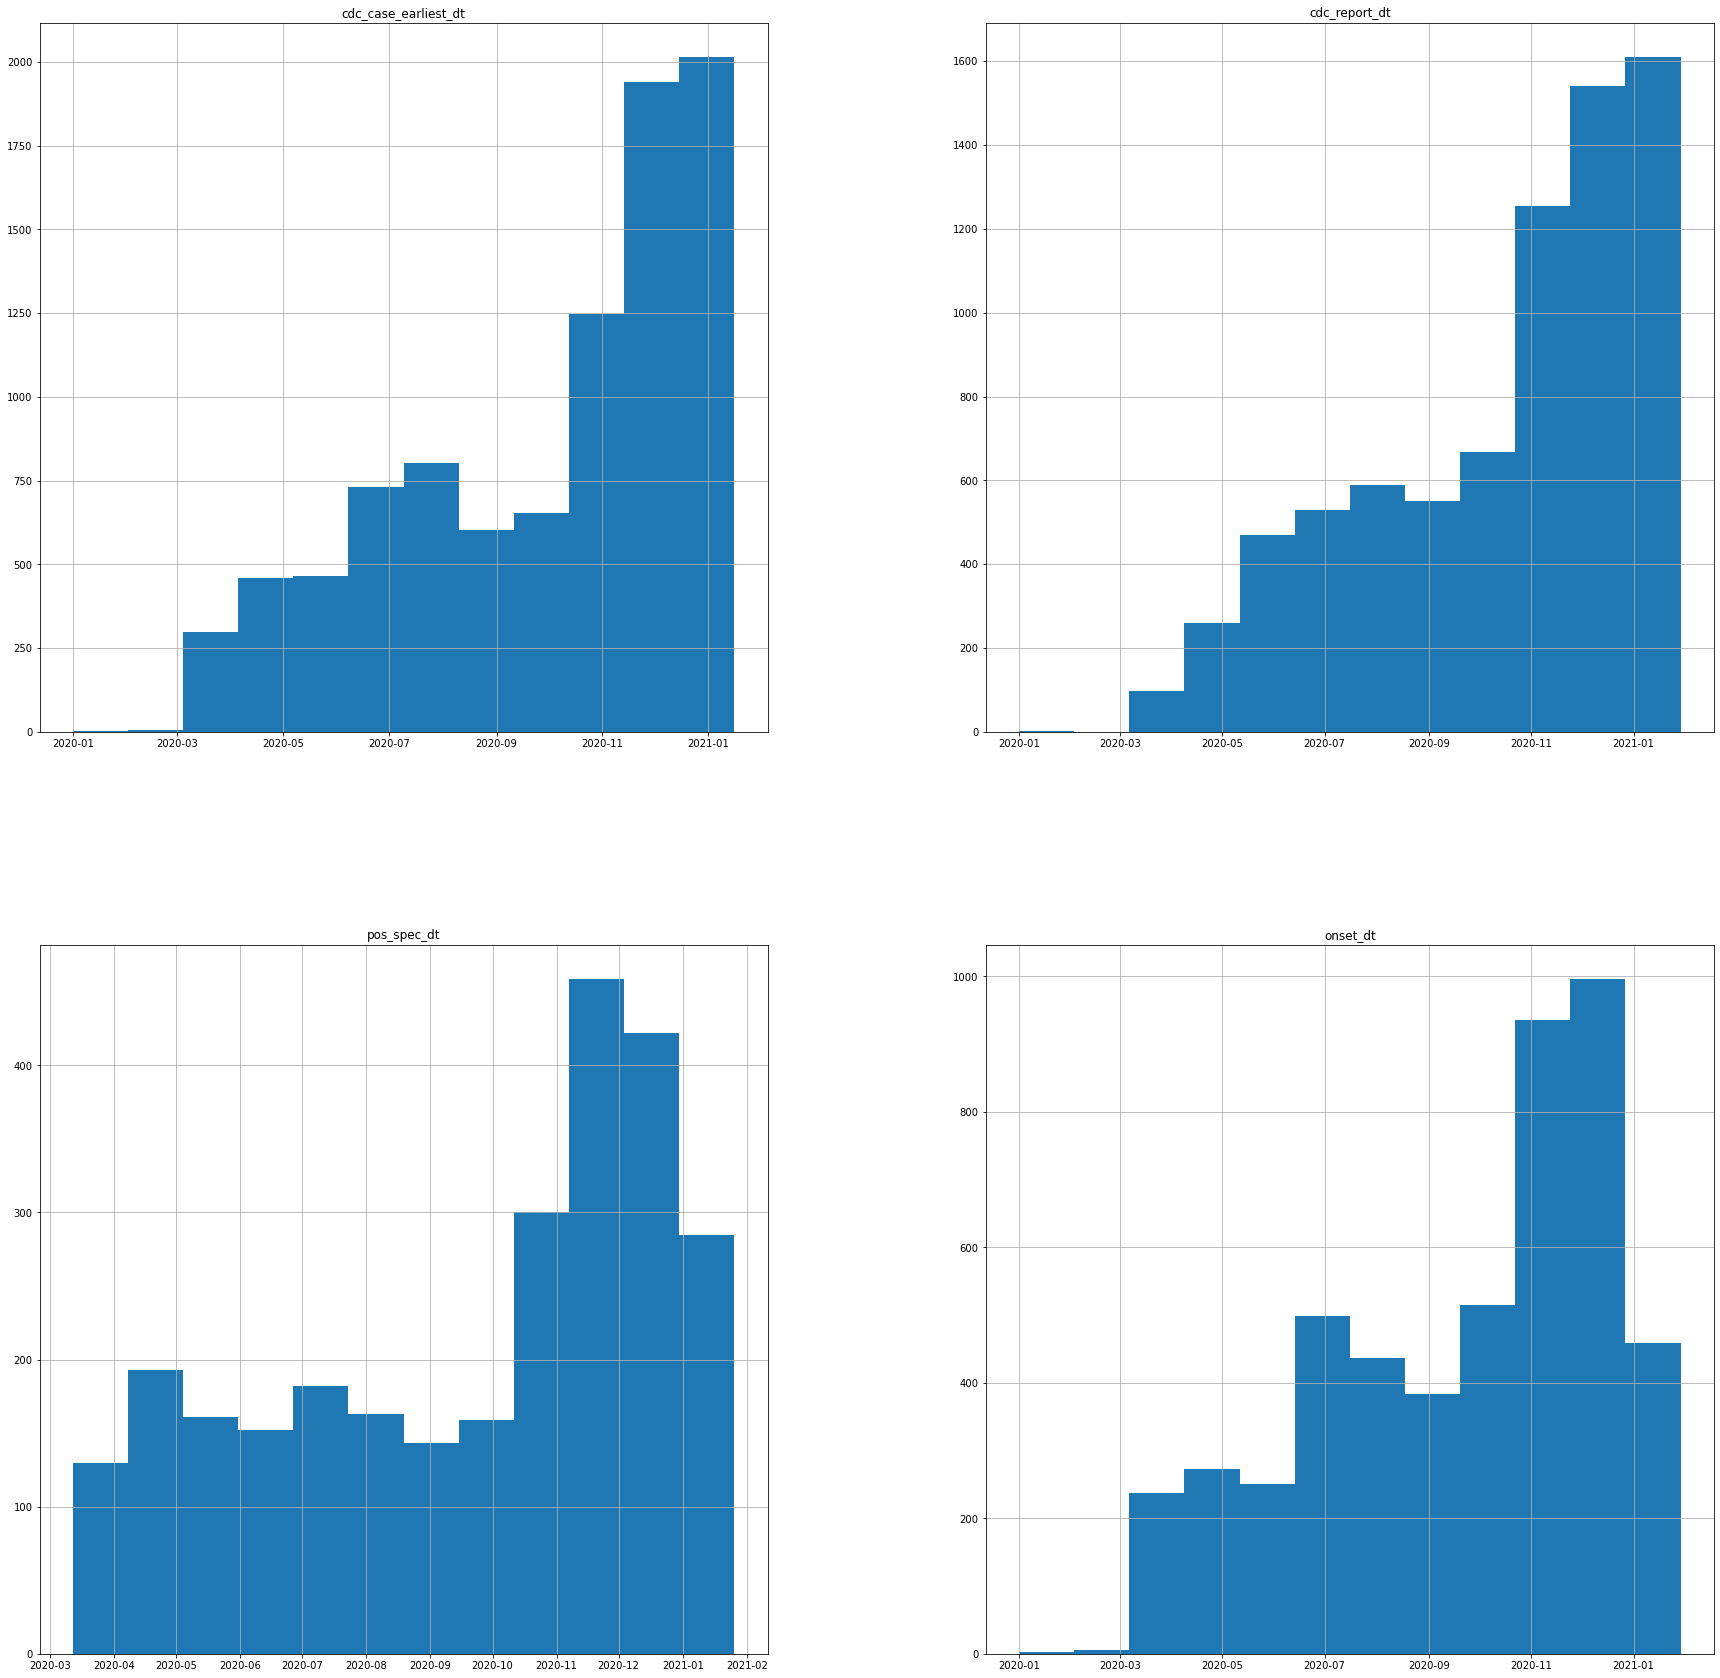

In [35]:
# Plot histograms for continuous features
df[continuous_columns].hist(layout=(2, 2), figsize=(30,30), bins=12)
plt.savefig('plots/continuous_histograms_1-1.pdf')

### Plot box plots for all **continuous** features  

> As the only continuous features in this dataset are time series I do not feel it is necessary to create box plots for these features as I am not concerned about the central tendency of these features

### Plot bar plots for all **categorical** features  

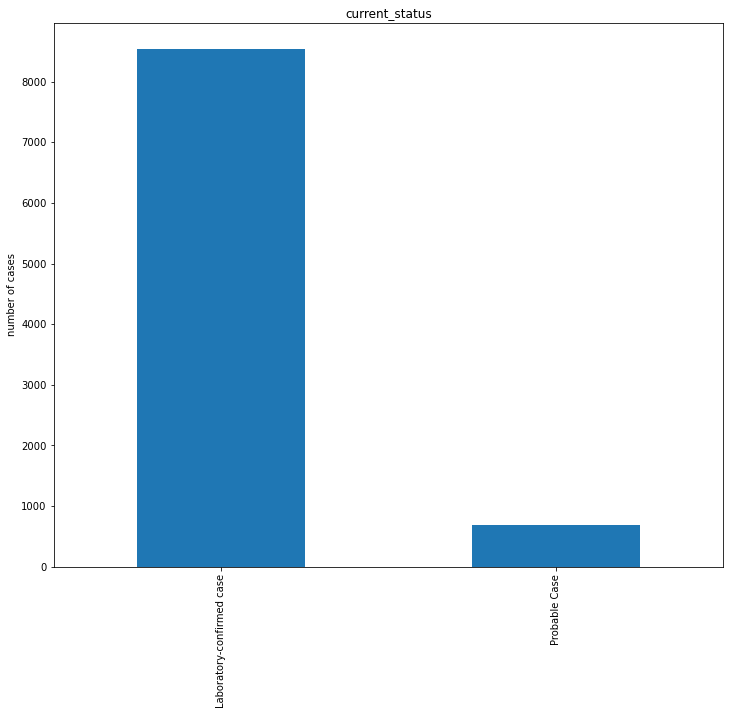

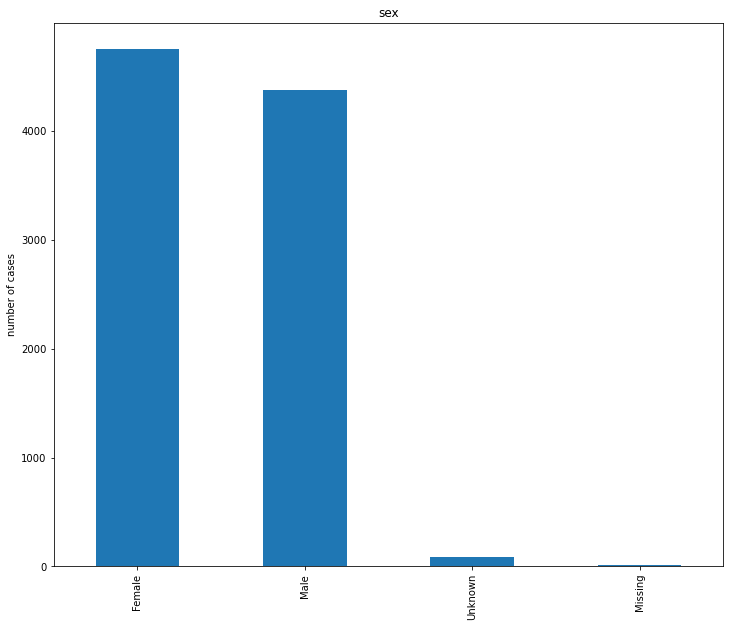

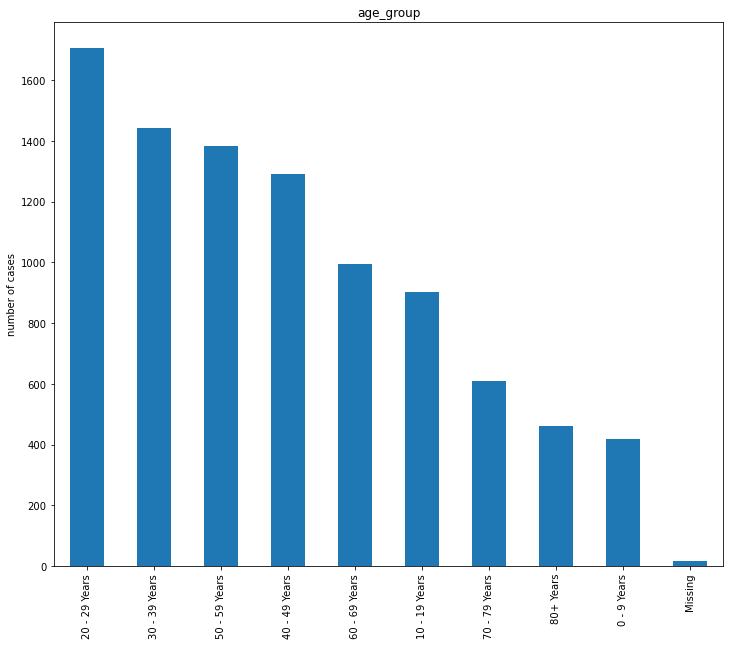

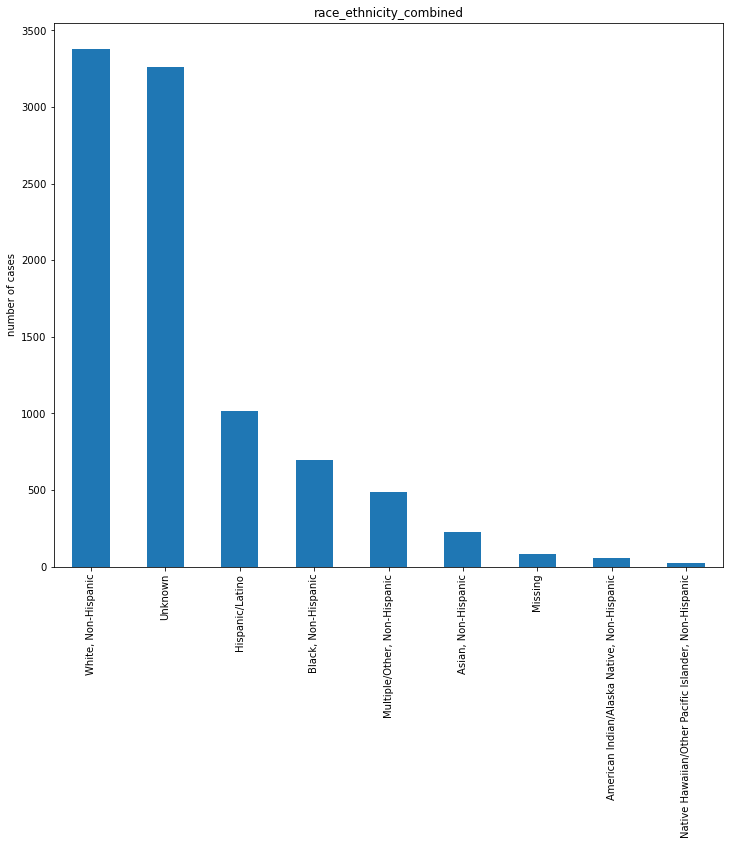

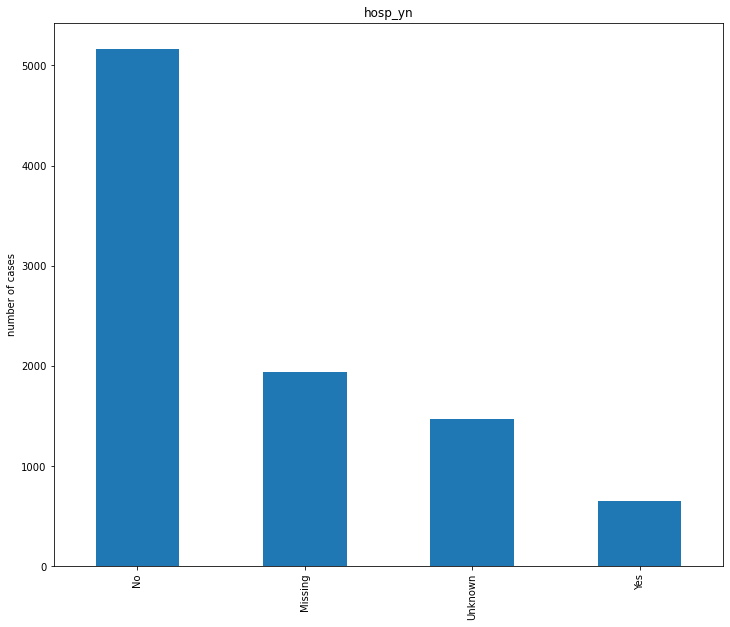

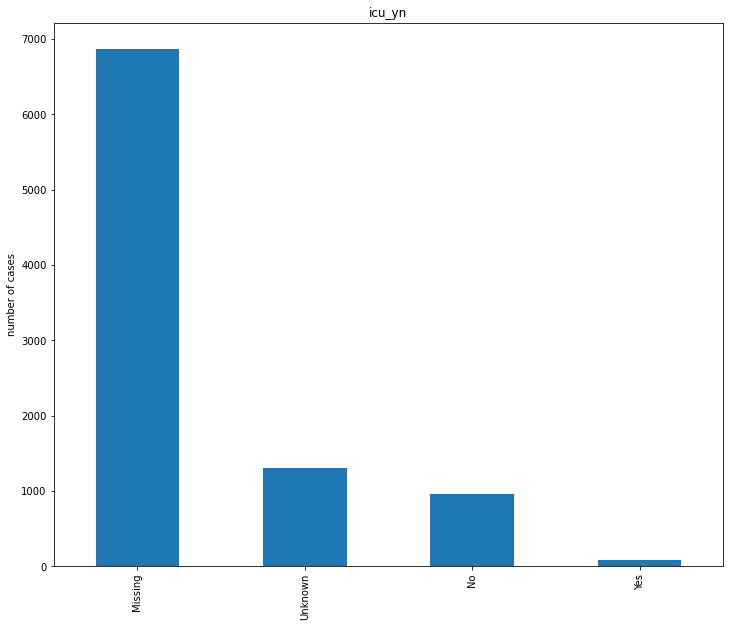

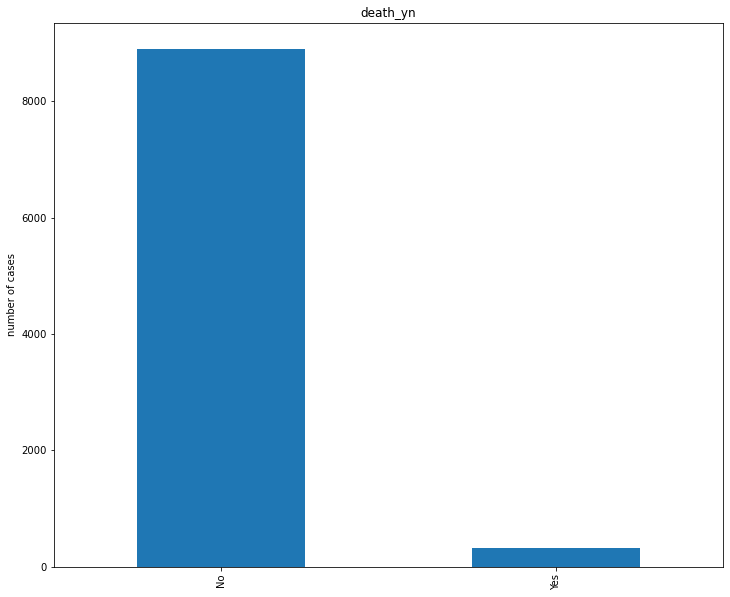

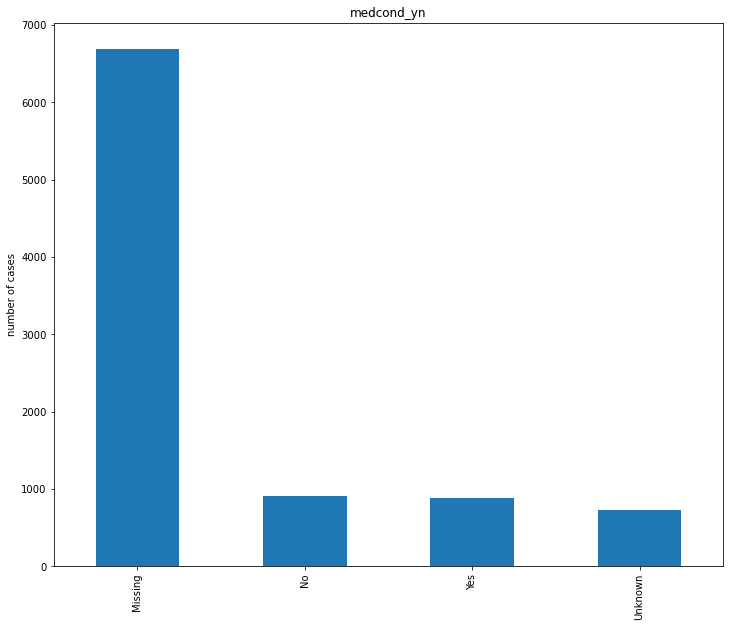

In [36]:
# Plot bar plots for categorical features
with PdfPages('plots/categorical_barplots_1-1.pdf') as pp:
    for col in categorical_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
        plt.title(col)
        plt.ylabel('number of cases')
        pp.savefig(f.get_figure())
        plt.show()

### Check Logical Integrity of Data

##### Test 1: Check that cdc_case_earliest_dt < onset_dt

In [37]:
test_1 = df[['cdc_case_earliest_dt','onset_dt']][df['cdc_case_earliest_dt']>df['onset_dt']]
print(f"Number of rows failing the test: {test_1.shape[0]}")
test_1

Number of rows failing the test: 1


,cdc_case_earliest_dt,onset_dt
8054,2020-01-22,2020-01-05


In [38]:
df.loc[[8054]]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
8054,2020-01-22,2020-01-05,2020-12-28,2020-01-05,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,Unknown,No,No


##### Test 2: Check if any entries were admitted to ICU but not Hospitalised

In [39]:
test_2 = df[['hosp_yn','icu_yn']][df['hosp_yn']=="No"][df['icu_yn']=='Yes']
print(f"Number of rows failing the test: {test_2.shape[0]}")
test_2

Number of rows failing the test: 0


<ipython-input-39-80bcd06e6d7e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_2 = df[['hosp_yn','icu_yn']][df['hosp_yn']=="No"][df['icu_yn']=='Yes']


,hosp_yn,icu_yn


##### Test 3: Check if any entries were a Probable Case and resulted in death

In [40]:
test_3 = df[['cdc_case_earliest_dt', 'onset_dt',
       'current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']][df['current_status']=="Probable Case"][df['death_yn']=="Yes"]
print(f"Number of rows failing the test: {test_3.shape[0]}")
test_3

Number of rows failing the test: 26


<ipython-input-40-5e2e4b6009cc>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_3 = df[['cdc_case_earliest_dt', 'onset_dt',


,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
981,2020-11-24,NaT,Probable Case,Male,60 - 69 Years,"Black, Non-Hispanic",No,Missing,Yes,Yes
1327,2020-05-24,NaT,Probable Case,Male,50 - 59 Years,Unknown,Missing,Missing,Yes,Unknown
2017,2020-12-26,2020-12-26,Probable Case,Male,40 - 49 Years,"White, Non-Hispanic",Missing,Missing,Yes,Missing
2197,2020-11-11,NaT,Probable Case,Female,60 - 69 Years,"White, Non-Hispanic",Yes,Unknown,Yes,Missing
2296,2020-12-03,2020-12-03,Probable Case,Female,70 - 79 Years,Unknown,No,No,Yes,Yes
2363,2020-12-26,2020-12-26,Probable Case,Male,80+ Years,"White, Non-Hispanic",Missing,Missing,Yes,Missing
2496,2020-12-14,NaT,Probable Case,Male,70 - 79 Years,"Asian, Non-Hispanic",Missing,Missing,Yes,Missing
2706,2020-05-16,NaT,Probable Case,Male,50 - 59 Years,"Asian, Non-Hispanic",Missing,Missing,Yes,Yes
3076,2020-04-11,NaT,Probable Case,Female,80+ Years,"White, Non-Hispanic",Unknown,Unknown,Yes,Yes
3331,2020-09-02,NaT,Probable Case,Male,40 - 49 Years,Unknown,Yes,Missing,Yes,Missing


##### Test 4: Check if an entries showed symptoms more than 14 days after case date

In [41]:
test_4 = df[['cdc_case_earliest_dt','onset_dt']][df['onset_dt'] - df['cdc_case_earliest_dt'] > datetime.timedelta(14)]
print(f"Number of rows failing the test: {test_4.shape[0]}")
test_4

Number of rows failing the test: 25


,cdc_case_earliest_dt,onset_dt
46,2020-04-12,2020-11-25
63,2020-04-25,2020-07-27
248,2020-04-29,2020-05-20
383,2020-04-05,2020-09-02
2480,2020-05-23,2020-06-19
2501,2020-07-10,2020-09-30
3368,2020-06-26,2020-07-15
3405,2020-11-16,2020-12-01
3971,2021-01-04,2021-01-29
4599,2020-05-18,2020-07-21


In [42]:
print("{:^10} | {:^19} | {:^19} | {:^18}".format("index","case_date","onset_date","days_until_symptoms"))
print("-"*77)
for row in test_4.index:

    #print(f"{tt['onset_dt'][row]}-{tt['cdc_case_earliest_dt'][row]}")
    onset = test_4['onset_dt'][row]
    case = test_4['cdc_case_earliest_dt'][row]
    time_till_symp = (onset-case)
    two_weeks = datetime.timedelta(14)
    if time_till_symp > two_weeks:
        #print(time_till_symp.days)
        print("{:>8}   | {} | {} | {:>10}".format(row,case,onset,time_till_symp.days))

  index    |      case_date      |     onset_date      | days_until_symptoms
-----------------------------------------------------------------------------
      46   | 2020-04-12 00:00:00 | 2020-11-25 00:00:00 |        227
      63   | 2020-04-25 00:00:00 | 2020-07-27 00:00:00 |         93
     248   | 2020-04-29 00:00:00 | 2020-05-20 00:00:00 |         21
     383   | 2020-04-05 00:00:00 | 2020-09-02 00:00:00 |        150
    2480   | 2020-05-23 00:00:00 | 2020-06-19 00:00:00 |         27
    2501   | 2020-07-10 00:00:00 | 2020-09-30 00:00:00 |         82
    3368   | 2020-06-26 00:00:00 | 2020-07-15 00:00:00 |         19
    3405   | 2020-11-16 00:00:00 | 2020-12-01 00:00:00 |         15
    3971   | 2021-01-04 00:00:00 | 2021-01-29 00:00:00 |         25
    4599   | 2020-05-18 00:00:00 | 2020-07-21 00:00:00 |         64
    4787   | 2020-06-01 00:00:00 | 2020-06-24 00:00:00 |         23
    4961   | 2020-06-29 00:00:00 | 2020-11-15 00:00:00 |        139
    5324   | 2020-05-18 00:00

### Discuss your initial findings

Initial findings and detailed discussion for each feature can be found in the accompanying *DataQualityReport.pdf* file.

***

# 2. Data Quality Plan (30)

##### Prepare for the cleaned CSV file.  
##### Mark down all the features where there are potential problems or data quality issues.  
##### Propose solutions to deal with the problems identified.  

| Variable Name           | Data Quality Issue | Handling Strategy      |
| :---------------------- | :----------------- | :--------------------- |
| cdc_report_dt           | Deprecated         | Drop Feature           |
| pos_spec_dt             | Missing Values     | Drop Feature           |
| onset_dt                | Missing values     | Do Nothing             |
| current_status          | Primarily 'Laboratory-confirmed case' | Remove 'Probable case rows' |
| sex                     | Missing Values     | Replace with 'Unknown' |
| age_group               | Missing Values     | Drop Entries           |
| race_ethnicity_combined | Missing Values     | Replace with 'Unknown' |
| hosp_yn                 | Missing Values     | Replace with 'Unknown' |
| icu_yn                  | Missing Values     | Replace with 'Unknown' |
| medcond_yn              | Missing Values     | Replace with 'Unknown' |

##### Explain why did you choose one solution over potentially many others. It is v.important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.  

I chose to drop the two continuous features as I believe that for building a solution for death risk prediction only the earliest case date and the date on which symptoms occur will be needed.
<br>
I chose to replace missing values with 'Unknown' as in most cases the missing values made up a larger proportion of the dataset.
<br>
I chose to drop the entries where age_group was missing as they were less than 1% of the dataset and it would be impractical for future analysis to replace them with 'Unknown'. 
<br>
I chose to drop entries which were probable cases as I believe for building a reliable death risk prediction model only the data from genuine confirmed cases should be used so as not to skew any results.

### Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed.  

##### For Logical Integrity Test 1 replace cdc_case_earliest_dt with cdc_report_dt.

In [43]:
df['cdc_case_earliest_dt'][8054] = df['cdc_report_dt'][8054]

##### For Logical Integrity Test 4 drop rows where time from cdc_case_earliest_dt to onset_dt was greater than 14 days (covid-19 incubation period).

In [44]:
# Drop rows found in Test 4
df = df.drop(index=test_4.index)
print(f"Number of rows dropped: {len(test_4.index)}")

Number of rows dropped: 25


##### Drop the features cdc_report_dt and pos_spec_dt as they have a high number of missing values and I believe only cdc_case_earliest_dt and onset_dt will be needed in future analysis.

In [45]:
# Drop features
df = df.drop(columns='cdc_report_dt')
df = df.drop(columns='pos_spec_dt')
print(f"Features dropped: cdc_report_dt, pos_spec_dt")

Features dropped: cdc_report_dt, pos_spec_dt


##### Drop rows that are ‘Probable case’ as any future modelling should be done on data from confirmed cases.

In [46]:
# Drop Probable Cases
rows_before = df.shape[0]
df = df[df['current_status']=='Laboratory-confirmed case']
rows_after = df.shape[0]
print(f"Number of rows dropped {rows_before-rows_after}")

Number of rows dropped 683


In [47]:
# Remove current_status feature as it is now a constant column
df = df.drop(columns='current_status')

##### Drop entries where age_group is missing.

In [48]:
# Drop entries where age_group is missing
rows_before = df.shape[0]
df = df[df['age_group']!='Missing']
rows_after = df.shape[0]
print(f"Number of rows dropped {rows_before-rows_after}")

Number of rows dropped 6


##### For sex, race_ethnicity_combined, hosp_yn, icu_yn, and medcond_yn replace missing values with ‘Unknown’.

In [49]:
# Replace missing values with 'Unknown'
df = df.replace('Missing', 'Unknown')

### Save the new CSV file with a self explanatory name.  

In [50]:
df.to_csv('data/covid19-cdc-20204844_1-2_cleaned.csv')

### Save the data quality plan to a single PDF file.  

The Data Quality Plan can be found in the accompanying *DataQualityPlan.pdf* file.

***

# 3. Explore the Relationships Between Feature Pairs (15)

### Choose a subset of features you find promising and plot pairwise feature interactions (continuous-continuous/continuous-categorical/correlation plots) Explain your choices.  

I am going to explore the relationship between the proportion of cases resulting in death and;
    
    - sex
    - age_group
    - race_ethnicity_combined
    - medcond_yn

I want to see if a case is more or less likely to result in death given any one of these features. Is there a disparity between sex and death rate? Are cases at certain age groups more likely to result in death? Is there also a disparity between different race and ethnicities and likelihood of death? Is the presence of underlying comorbidity and disease more likely to result in death?

##### Relationship between cases resulting in death and sex

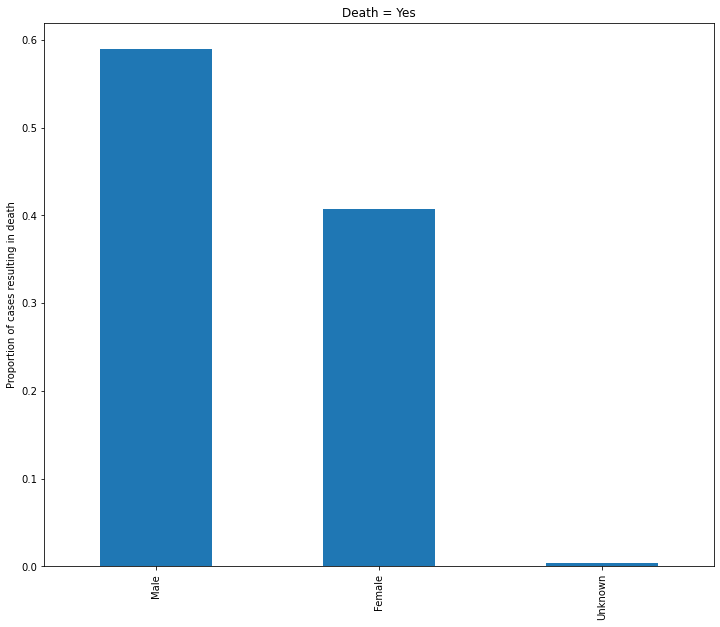

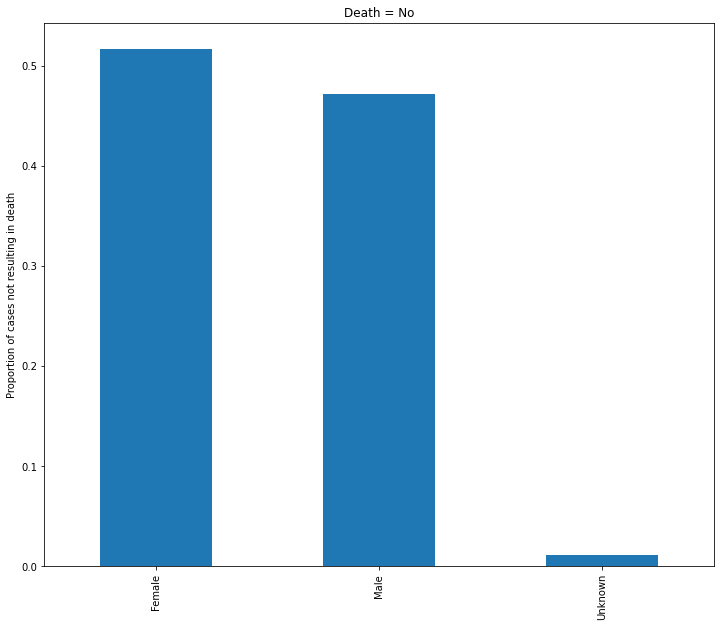

In [51]:
# Death and sex
with PdfPages('plots/death-sex_barplots_1-1.pdf') as pp:
    death_yes = df[df['death_yn']=='Yes']
    f = death_yes['sex'].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))
    plt.title('Death = Yes')
    plt.ylabel('Proportion of cases resulting in death')
    pp.savefig(f.get_figure())
    plt.show()
    death_no = df[df['death_yn']=='No']
    f = death_no['sex'].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))
    plt.title('Death = No')
    plt.ylabel('Proportion of cases not resulting in death')
    pp.savefig(f.get_figure())
    plt.show()

##### Relationship between cases resulting in death and age_group

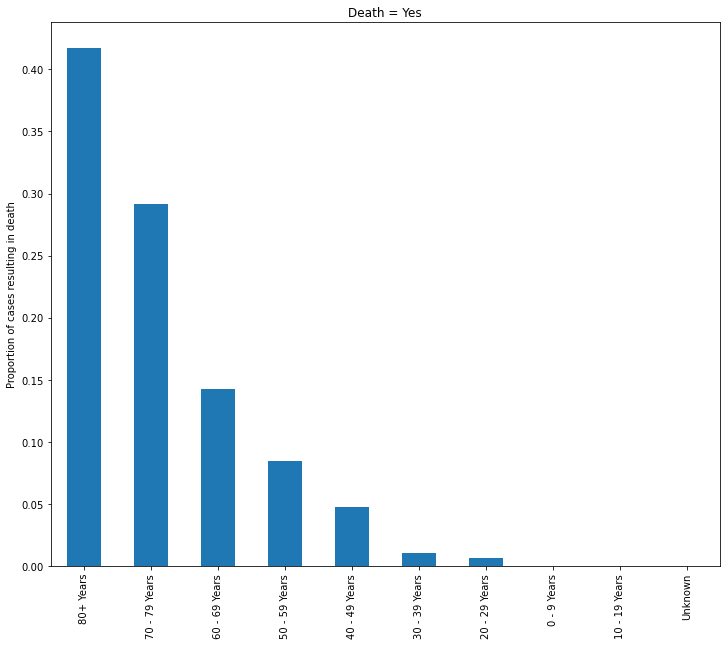

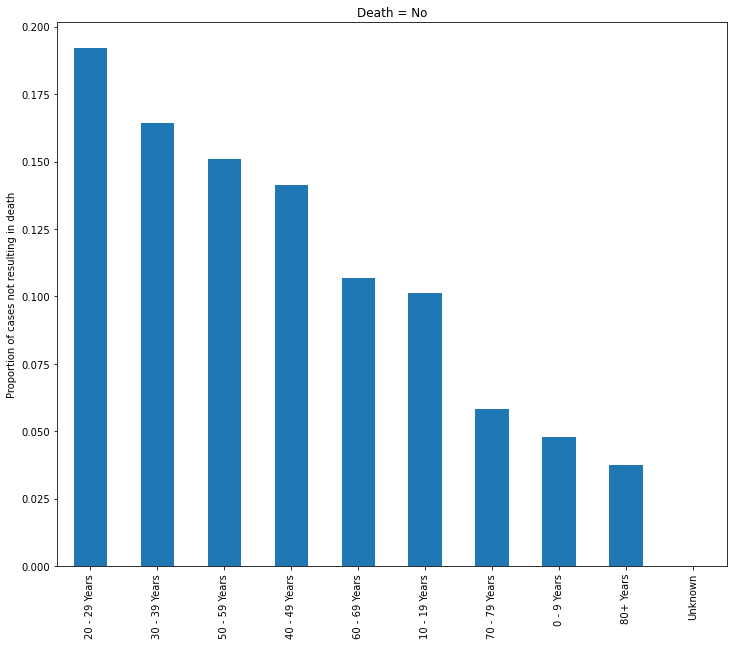

In [52]:
# Death and age_group
with PdfPages('plots/death-age_group_barplots_1-1.pdf') as pp:
    death_yes = df[df['death_yn']=='Yes']
    f = death_yes['age_group'].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))
    plt.title('Death = Yes')
    plt.ylabel('Proportion of cases resulting in death')
    pp.savefig(f.get_figure())
    plt.show()
    death_no = df[df['death_yn']=='No']
    f = death_no['age_group'].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))
    plt.title('Death = No')
    plt.ylabel('Proportion of cases not resulting in death')
    pp.savefig(f.get_figure())
    plt.show()

##### Relationship between cases resulting in death and race_ethnicity_combined

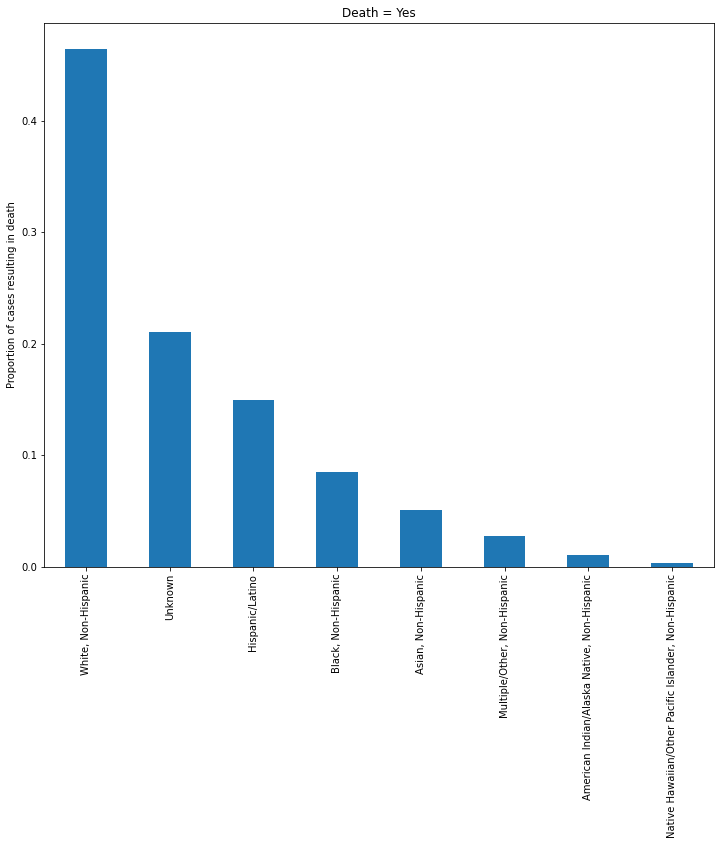

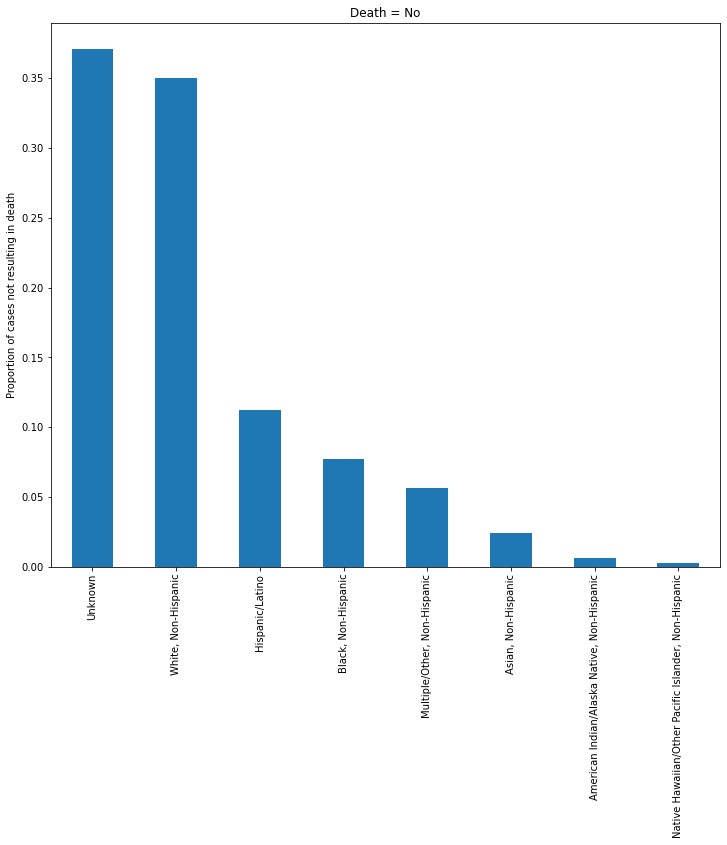

In [53]:
# Death and race_ethnicity_combined
with PdfPages('plots/death-race_ethnicity_barplots_1-1.pdf') as pp:
    death_yes = df[df['death_yn']=='Yes']
    f = death_yes['race_ethnicity_combined'].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))
    plt.title('Death = Yes')
    plt.ylabel('Proportion of cases resulting in death')
    pp.savefig(f.get_figure())
    plt.show()
    death_no = df[df['death_yn']=='No']
    f = death_no['race_ethnicity_combined'].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))
    plt.title('Death = No')
    plt.ylabel('Proportion of cases not resulting in death')
    pp.savefig(f.get_figure())
    plt.show()

##### Relationship between cases resulting in death and medcond_yn

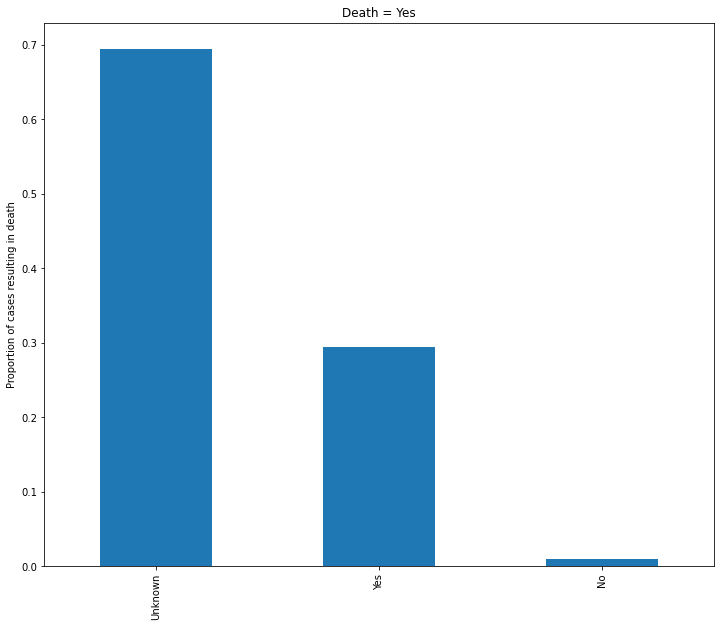

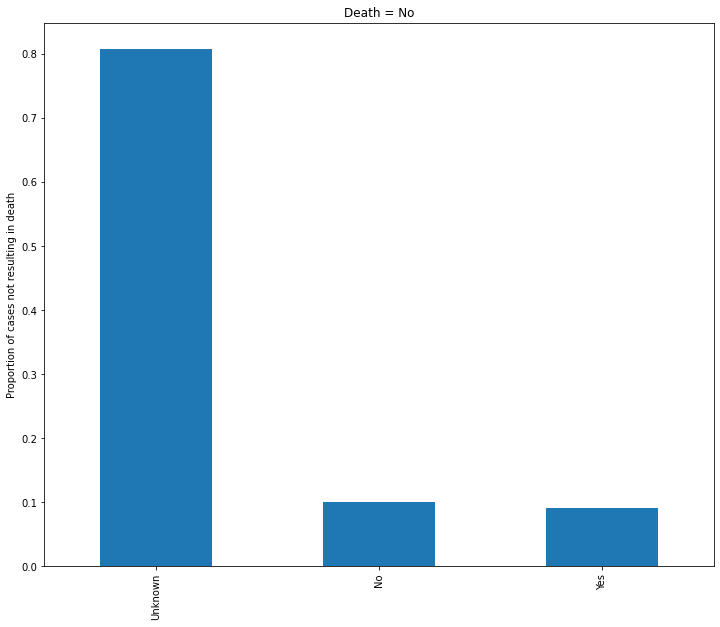

In [54]:
# Death and medcond_yn
with PdfPages('plots/death-medcond_yn_barplots_1-1.pdf') as pp:
    death_yes = df[df['death_yn']=='Yes']
    f = death_yes['medcond_yn'].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))
    plt.title('Death = Yes')
    plt.ylabel('Proportion of cases resulting in death')
    pp.savefig(f.get_figure())
    plt.show()
    death_no = df[df['death_yn']=='No']
    f = death_no['medcond_yn'].value_counts(normalize=True).plot(kind='bar', figsize=(12,10))
    plt.title('Death = No')
    plt.ylabel('Proportion of cases not resulting in death')
    pp.savefig(f.get_figure())
    plt.show()

### Discuss your findings from the plots above. Do you find any feature(s) combinations that are indicative of the target outcome? Explain in plain words (short paragraph) the story of your findings so far.

A greater proportion of the cases resulting in death are males while a slightly higher proportion of the cases not resulting in death are female.  
Cases that result in death are significantly skewed towards the older age group while the opposite is true for cases that do not result in death.  
A very high proportion of the deaths are White,Non-hispanic however this group make up a majority of the entries in this dataset.  
While there is a very significant number of entries where medcond_yn is unknown it is clear to see that cases relating in death are much more likely to have a presence of underlying comorbidity or disease.  
It is interesting that males make up a greater proportion of the deaths and likewise older age groups also make up a greater proportion of the cases resulting in death.  
The problem of 'Unknown' values makes it hard to draw true inferences from the data.

***

# 4. Transform/Extend/Combine

### Transform/Extend/Combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making.  

#### New Feature 1

    - SymptomsWithinOneWeek: True if symptoms occur within one week
    - Will allow to see if a quicker onset of symptoms results in a greater likelihood of death

In [55]:
df['SymptomsWithinOneWeek'] = df['onset_dt'] - df['cdc_case_earliest_dt'] <= datetime.timedelta(7)

In [56]:
df.head()

,cdc_case_earliest_dt,onset_dt,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,SymptomsWithinOneWeek
0,2020-03-18,2020-03-18,Male,20 - 29 Years,Unknown,No,Unknown,No,Yes,True
1,2020-12-04,NaT,Female,10 - 19 Years,"Multiple/Other, Non-Hispanic",No,Unknown,No,Unknown,False
2,2021-01-12,NaT,Male,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown,False
3,2020-11-04,2020-11-04,Male,50 - 59 Years,"White, Non-Hispanic",No,Unknown,No,No,True
4,2020-04-10,2020-04-10,Male,50 - 59 Years,Unknown,No,Unknown,No,Unknown,True


#### New Feature 2

    - SymptomsWithinTwoWeeks: True if symptoms occur between one and two weeks after case date
    - Will allow to compare against SymptomsWithinOneWeek to see if a quicker onset of symptoms results in a greater
      likelihood of death

In [57]:
df['SymptomsWithinTwoWeeks'] = df['onset_dt'] - df['cdc_case_earliest_dt'] > datetime.timedelta(7)

In [58]:
df.head()

,cdc_case_earliest_dt,onset_dt,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,SymptomsWithinOneWeek,SymptomsWithinTwoWeeks
0,2020-03-18,2020-03-18,Male,20 - 29 Years,Unknown,No,Unknown,No,Yes,True,False
1,2020-12-04,NaT,Female,10 - 19 Years,"Multiple/Other, Non-Hispanic",No,Unknown,No,Unknown,False,False
2,2021-01-12,NaT,Male,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown,False,False
3,2020-11-04,2020-11-04,Male,50 - 59 Years,"White, Non-Hispanic",No,Unknown,No,No,True,False
4,2020-04-10,2020-04-10,Male,50 - 59 Years,Unknown,No,Unknown,No,Unknown,True,False


#### New Feature 3

    - MedcondICU: True if presence of underlying comorbidity/disease and addmitted to ICU
    - Will allow to see if underlying medical conditions are more likely to result in admission to ICU and the effect this
      has on death outcome

In [59]:
icu_y = df[df['icu_yn']=='Yes']
MedcondICU = icu_y['medcond_yn']=='Yes'
df['MedcondICU'] = MedcondICU

In [60]:
df.head()

,cdc_case_earliest_dt,onset_dt,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,SymptomsWithinOneWeek,SymptomsWithinTwoWeeks,MedcondICU
0,2020-03-18,2020-03-18,Male,20 - 29 Years,Unknown,No,Unknown,No,Yes,True,False,NaN
1,2020-12-04,NaT,Female,10 - 19 Years,"Multiple/Other, Non-Hispanic",No,Unknown,No,Unknown,False,False,NaN
2,2021-01-12,NaT,Male,0 - 9 Years,Unknown,Unknown,Unknown,No,Unknown,False,False,NaN
3,2020-11-04,2020-11-04,Male,50 - 59 Years,"White, Non-Hispanic",No,Unknown,No,No,True,False,NaN
4,2020-04-10,2020-04-10,Male,50 - 59 Years,Unknown,No,Unknown,No,Unknown,True,False,NaN


### Save it as a CSV file with self explanatory name.  

In [61]:
df.to_csv('data/covid19-cdc-20204844_1-3_cleaned.csv')

***